# Convolutional Neural Network
Created by Eduardo de Jesús Dávila Meza

## Architecture:
- Input layer (Image channels)
- 2 convolutional layers + ReLU + Max Pooling
- 3 fully connected hidden layers
- Output layer (According to the number of classes)

## Tested on: 
- Ubuntu 16.04
- Python 3.5 and 3.7

## Requirements:
- Matpotlib: pip3 install matplotlib
- TensorFlow 1.15 (Release for CPU-only): pip3 install tensorflow==1.15

In [1]:
# %pip install tensorflow==1.15

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import sys
# sys.path.remove('/opt/ros/kinetic/lib/python2.7/dist-packages')#If ROS Kinetic is installed
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.python.framework import ops

ops.reset_default_graph()
session = tf.Session()

c:\Users\mary9\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
c:\Users\mary9\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (



Instructions for updating:
non-resource variables are not supported in the long term


## Load dataset

In [5]:
#Get the MNIST dataset
(train_images, train_labels),(test_images, test_labels) = load_data()

#Height and width of the images for the training
dim = train_images[0].shape[0]

#Input and output data for training
train_xdata = np.array(train_images,np.float64)/255
train_labels = np.array(train_labels,np.int32)

train_images = np.array(train_images)

#Input and output data for test
test_xdata = np.array(test_images,np.float64)/255
test_labels = np.array(test_labels,np.int32)

test_images = np.array(test_images)

#Print dimensions
print(dim)

print(train_xdata.shape)
print(train_labels.shape)

print(test_xdata.shape)
print(test_labels.shape)

28
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


## Model parameters

In [7]:
## For the training
epochs = 2500
eval_every = 5

batch_size = 100
evaluation_size = 100

#For AdamOptimizer
learning_rate = 0.001
beta1 = 0.9
beta2 = 0.999

image_width = train_xdata[0].shape[0]
print(image_width)

image_height = train_xdata[0].shape[1]
print(image_height)

target_size = max(train_labels)+1
print(target_size)

## For the architecture of the neural network
num_channels = 1 #Image channels

conv1_features = 20 #Filters in convolutional layer 1
conv2_features = 30 #Filters in convolutional layer 2

max_pool_size1 = 2
max_pool_size2 = 2

full_connected_size1 = 1024 #Neurons in fully connected hidden layer 1 
full_connected_size2 = 256 #Neurons in fully connected hidden layer 1
full_connected_size3 = 64 #Neurons in fully connected hidden layer 1 

sd = 0.01 #Standard deviation

28
28
10


In [8]:
x_input_shape = (batch_size, image_width, image_height, num_channels)
x_input = tf.placeholder(tf.float32, shape = x_input_shape)
y_target = tf.placeholder(tf.int32, shape = batch_size)

eval_input_shape = (evaluation_size, image_width, image_height, num_channels)
eval_input = tf.placeholder(tf.float32, shape = eval_input_shape)
eval_target = tf.placeholder(tf.float32, shape = evaluation_size)

# Weights in the covolutions

In [9]:
conv1_weight = tf.Variable(tf.truncated_normal([3,3,num_channels,conv1_features], stddev = sd, dtype = tf.float32))
conv1_bias = tf.Variable(tf.truncated_normal([conv1_features], stddev = sd, dtype = tf.float32))

conv2_weight = tf.Variable(tf.truncated_normal([3,3,conv1_features,conv2_features], stddev = sd, dtype = tf.float32))
conv2_bias = tf.Variable(tf.truncated_normal([conv2_features], stddev = sd, dtype = tf.float32))

# Fully connected layers

In [10]:
resulting_width = image_width // (max_pool_size1*max_pool_size2)
print(resulting_width)
resulting_height = image_height // (max_pool_size1*max_pool_size2)
print(resulting_height)

# Inputs for the first fully connected hidden layer
full_input_size_1 = resulting_width*resulting_height*conv2_features
print(full_input_size_1)

# Fully connected hidden layer 1
full_weight_1 = tf.Variable(tf.truncated_normal([full_input_size_1,full_connected_size1], stddev = sd, dtype = tf.float32))
full_bias_1 = tf.Variable(tf.truncated_normal([full_connected_size1], stddev = sd, dtype = tf.float32))

# Fully connected hidden layer 2
full_weight_2 = tf.Variable(tf.truncated_normal([full_connected_size1,full_connected_size2], stddev = sd, dtype = tf.float32))
full_bias_2 = tf.Variable(tf.truncated_normal([full_connected_size2], stddev = sd, dtype = tf.float32))

# Fully connected hidden layer 3
full_weight_3 = tf.Variable(tf.truncated_normal([full_connected_size2,full_connected_size3], stddev = sd, dtype = tf.float32))
full_bias_3 = tf.Variable(tf.truncated_normal([full_connected_size3], stddev = sd, dtype = tf.float32))

# Last fully connected layer (output layer)
last_full_weight = tf.Variable(tf.truncated_normal([full_connected_size3,target_size], stddev = sd, dtype = tf.float32))
last_full_bias = tf.Variable(tf.truncated_normal([target_size], stddev = sd, dtype = tf.float32))

7
7
1470


In [11]:
def my_conv_neural_net(input_data):
    # Convolutional layer 1 (Conv+ReLU+Maxpool)
    conv1 = tf.nn.conv2d(input_data, conv1_weight, strides=[1,1,1,1], padding="SAME")
    relu1 = tf.nn.relu(tf.nn.bias_add(conv1, conv1_bias))
    max_pool_1 = tf.nn.max_pool(relu1, ksize=[1,max_pool_size1, max_pool_size1,1], 
                                strides=[1,max_pool_size1,max_pool_size1,1], padding="VALID")#SAME

    # Convolutional layer 2 (Conv+ReLU+Maxpool)
    conv2 = tf.nn.conv2d(max_pool_1, conv2_weight, strides=[1,1,1,1], padding="SAME")
    relu2 = tf.nn.relu(tf.nn.bias_add(conv2, conv2_bias))
    max_pool_2 = tf.nn.max_pool(relu2, ksize=[1,max_pool_size2, max_pool_size2,1], 
                                strides=[1,max_pool_size2,max_pool_size2,1], padding="VALID")#SAME

    # Flat the image channels in a vector
    final_conv_shape = max_pool_2.get_shape().as_list()  
    final_shape = final_conv_shape[1]*final_conv_shape[2]*final_conv_shape[3]
    flat_output = tf.reshape(max_pool_2, [final_conv_shape[0], final_shape]) 

    # Fully connected hidden layer 1
    fully_connected_1 = tf.nn.relu(tf.add(tf.matmul(flat_output, full_weight_1), full_bias_1))

    # Fully connected hidden layer 2
    fully_connected_2 = tf.nn.relu(tf.add(tf.matmul(fully_connected_1, full_weight_2), full_bias_2))

    # Fully connected hidden layer 3
    fully_connected_3 = tf.nn.relu(tf.add(tf.matmul(fully_connected_2, full_weight_3), full_bias_3))

    # Output layer
    last_fully_connected = tf.add(tf.matmul(fully_connected_3, last_full_weight), last_full_bias)

    return last_fully_connected

## Create the objects for the model

In [12]:
model_output = my_conv_neural_net(x_input)
test_model_ouput = my_conv_neural_net(eval_input)

In [13]:
loss = tf.reduce_mean(tf.nn.sparse_softmax_cross_entropy_with_logits(logits = model_output, labels = y_target))

In [14]:
prediction = tf.nn.softmax(model_output)
test_prediction = tf.nn.softmax(test_model_ouput)

def get_accuracy(logits,targets):
    batch_predictions = np.argmax(logits, axis=1)
    num_corrects = np.sum(np.equal(batch_predictions, targets))
    return 100.0*num_corrects/batch_predictions.shape[0]

# Train the model

In [15]:
my_optim = tf.train.AdamOptimizer(learning_rate=learning_rate,beta1=beta1,beta2=beta2)#Adam
train_step = my_optim.minimize(loss)

In [16]:
#### Save the model
saver = tf.train.Saver()

In [17]:
init = tf.global_variables_initializer()
session.run(init)

In [18]:
train_loss = []
train_acc = []
test_acc = []
i_vals = []

i = 0
temp_train_loss = 1.0
temp_train_acc = 0.0
temp_test_acc = 0.0
while (i < epochs) and (temp_train_loss > 0.001):
    rand_idx = np.random.choice(len(train_xdata), size=batch_size)
    rand_x = train_xdata[rand_idx]
    rand_x = np.expand_dims(rand_x, 3)

    rand_y = train_labels[rand_idx]
    train_dict = {x_input: rand_x, y_target: rand_y}
    session.run(train_step, feed_dict=train_dict)
    temp_train_loss, temp_train_preds = session.run([loss,prediction], feed_dict = train_dict)
    temp_train_acc = get_accuracy(temp_train_preds, rand_y)

    ## For saving
    saved_path = saver.save(session, 'cnn_model_mnist/my_model', global_step=i+1)

    if ((i+1)%eval_every == 0)or(temp_train_loss <= 0.001)or((temp_train_acc >= 99.0)and(temp_test_acc >= 99.0)):
        rand_idx_eval = np.random.choice(len(test_xdata), size=evaluation_size)
        rand_x_eval = test_xdata[rand_idx_eval]
        rand_x_eval = np.expand_dims(rand_x_eval, 3)
        
        rand_y_eval = test_labels[rand_idx_eval]
        test_dict = {eval_input: rand_x_eval, eval_target: rand_y_eval}

        temp_test_preds = session.run(test_prediction, feed_dict = test_dict)
        temp_test_acc = get_accuracy(temp_test_preds, rand_y_eval)

        i_vals.append(i+1)
        train_loss.append(temp_train_loss)
        train_acc.append(temp_train_acc)
        test_acc.append(temp_test_acc)

        acc_and_loss = [(i+1), temp_train_loss, temp_train_acc, temp_test_acc]
        acc_and_loss = [np.round(x,3) for x in acc_and_loss]

        print("Epoch {}. Train loss: {:.4f}. Train acc: {:.2f}, Val acc: {:.1f}".format(*acc_and_loss))
    i = i + 1

Epoch 5. Train loss: 2.3020. Train acc: 9.00, Val acc: 9.0
Instructions for updating:
Use standard file APIs to delete files with this prefix.
Epoch 10. Train loss: 2.3030. Train acc: 9.00, Val acc: 8.0
Epoch 15. Train loss: 2.3030. Train acc: 10.00, Val acc: 15.0
Epoch 20. Train loss: 2.3010. Train acc: 12.00, Val acc: 14.0
Epoch 25. Train loss: 2.2980. Train acc: 10.00, Val acc: 17.0
Epoch 30. Train loss: 2.2800. Train acc: 5.00, Val acc: 16.0
Epoch 35. Train loss: 2.1760. Train acc: 10.00, Val acc: 11.0
Epoch 40. Train loss: 2.0620. Train acc: 27.00, Val acc: 15.0
Epoch 45. Train loss: 2.1530. Train acc: 11.00, Val acc: 16.0
Epoch 50. Train loss: 2.0120. Train acc: 27.00, Val acc: 25.0
Epoch 55. Train loss: 1.9720. Train acc: 29.00, Val acc: 17.0
Epoch 60. Train loss: 2.0180. Train acc: 23.00, Val acc: 28.0
Epoch 65. Train loss: 1.8080. Train acc: 22.00, Val acc: 17.0
Epoch 70. Train loss: 1.8290. Train acc: 23.00, Val acc: 25.0
Epoch 75. Train loss: 1.7800. Train acc: 16.00, Val ac

# Evaluate the trained convolutional neural network model

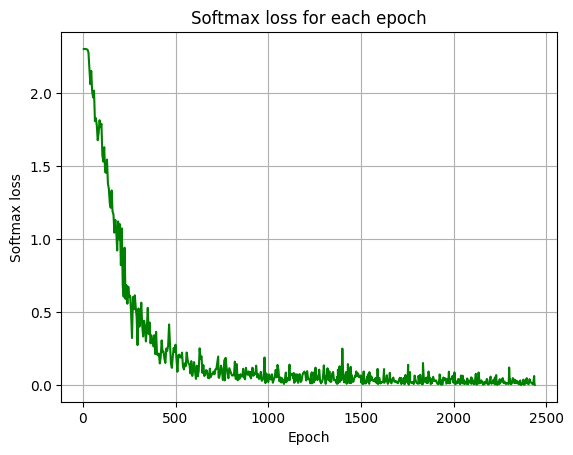

In [19]:
plt.plot(i_vals,train_loss, 'g-')
plt.title("Softmax loss for each epoch")
plt.xlabel("Epoch")
plt.ylabel("Softmax loss")
plt.grid()
plt.show()

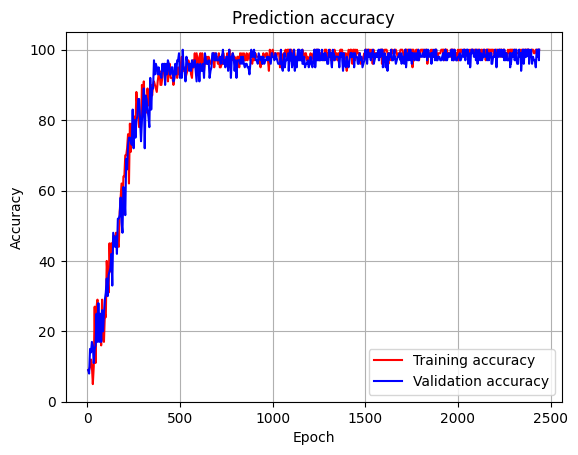

In [20]:
plt.plot(i_vals,train_acc, 'r-', label = "Training accuracy")
plt.plot(i_vals,test_acc, 'b-', label = "Validation accuracy")
plt.title("Prediction accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.ylim([0,105])
plt.legend(loc="lower right")
plt.grid()
plt.show()

## Evaluate some samples from the training data

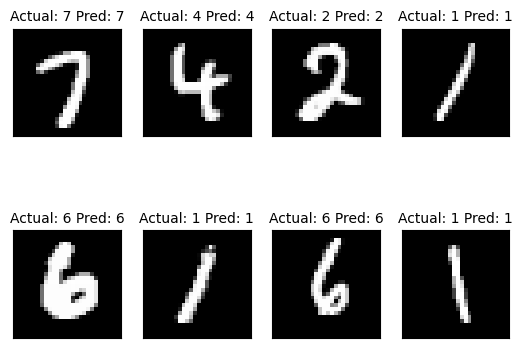

In [21]:
nrows = 2
ncols = 4
m = nrows*ncols
rand_idx = np.random.choice(batch_size, size=m)
actuals = rand_y[rand_idx]
predictions = np.argmax(temp_train_preds, axis=1)[rand_idx]

images = np.squeeze(rand_x[rand_idx])

for i in range(m):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(np.reshape(images[i], [dim,dim,1]), cmap = "Greys_r")
    plt.title("Actual: " +str(actuals[i]) +" Pred: " +str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)

## Evaluate some samples from the test data
### It requires updating the model file name according to the lastest epoch!

INFO:tensorflow:Restoring parameters from cnn_model_mnist/my_model-2438


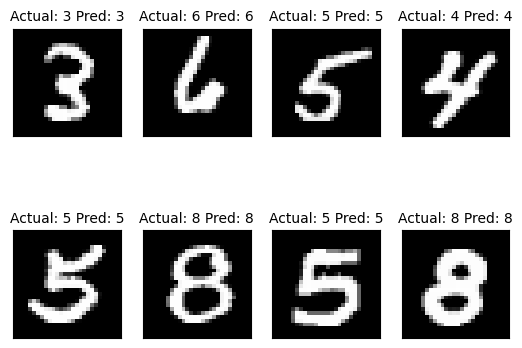

In [23]:
#### RUN NN
rand_idx_eval = np.random.choice(len(test_xdata), size=evaluation_size)
rand_x_eval = test_xdata[rand_idx_eval]
rand_x_eval = np.expand_dims(rand_x_eval, 3)

rand_y_eval = test_labels[rand_idx_eval]

test_dict = {eval_input: rand_x_eval, eval_target: rand_y_eval}

#### Restore variables
#It requires updating the file name according to the lastest training epoch!
saver.restore(session,'cnn_model_mnist/my_model-2438')
temp_test_preds = session.run(test_prediction, feed_dict = test_dict)

##### Print results
nrows = 2
ncols = 4
m = nrows*ncols
rand_idx = np.random.choice(evaluation_size, size=m)
actuals = rand_y_eval[rand_idx]
predictions = np.argmax(temp_test_preds, axis=1)[rand_idx]

images = np.squeeze(rand_x_eval[rand_idx])

for i in range(m):
    plt.subplot(nrows,ncols,i+1)
    plt.imshow(np.reshape(images[i], [dim,dim,1]), cmap = "Greys_r")
    plt.title("Actual: " +str(actuals[i]) +" Pred: " +str(predictions[i]), fontsize=10)
    frame = plt.gca()
    frame.axes.get_xaxis().set_visible(False)
    frame.axes.get_yaxis().set_visible(False)